In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
from sklearn.preprocessing import PolynomialFeatures
import datetime 
import pytz
from pytz import timezone
import tarfile
from numpy import load
import os
from sklearn.manifold import TSNE
import h5py
from sklearn.decomposition import PCA as sklearnPCA
from sklearn import metrics
from sklearn.metrics import pairwise_distances
from sklearn import datasets
from sklearn.metrics import davies_bouldin_score
from sklearn.cluster import DBSCAN
from sklearn.cluster import Birch
import scipy as sp
from scipy import spatial
from scipy import stats

In [3]:
h5 = h5py.File('sound_data_improved.hdf5', 'r')

In [4]:
d = h5['sound_data']

# Create a subsample of 10000 points from one sensor

Filter for sensor id (sonycnode-b827ebc178d2.sonyc first, just to test)

In [141]:
b827ebc178d2_mask = (d['sensor_id'] == b'sonycnode-b827ebc178d2.sonyc')

In [142]:
b827ebc178d2_data = d[b827ebc178d2_mask]

In [143]:
b827ebc178d2_indices = np.nonzero(b827ebc178d2_mask)[0]

In [10]:
b827ebc178d_data[0]['timestamp']

1559361616.0

In [11]:
len(b827ebc178d2_data)

1423048

In [56]:
#array with all feature vectors pertaining to a specific sensor, then array with timestamps corresponding to vector
# b827ebc178d2_data = []
# b827ebc178d2_timestamps = []
# b827ebc178d2_count = 0

In [57]:
# for i in range(3388858):
#     if d[i,'sensor_id'] == b'sonycnode-b827ebc178d2.sonyc':
#         b827ebc178d2_data.append(d[i, 'feature_vector'])
#         b827ebc178d2_timestamps.append(d[i, 'timestamp'])
#         b827ebc178d2_count += 1

In [45]:
b827ebc178d2_sample_nums = np.random.choice(range(len(b827ebc178d2_data)), 10000, replace = False)

In [46]:
index = np.zeros(len(b827ebc178d2_data)).astype('bool')
index[b827ebc178d2_sample_nums] = True

In [50]:
b827ebc178d2_sampled_data = b827ebc178d2_data[index]['feature_vector']

# Creating subsample of 10000 points from all four sensors

In [21]:
d.shape[0]

3388858

In [22]:
sample_nums = np.random.choice(range(d.shape[0]), 10000, replace = False)

In [23]:
d.shape

(3388858,)

In [24]:
all_index = np.zeros(d.shape[0]).astype('bool')
all_index[sample_nums] = True

In [25]:
all_sensor_data = d[all_index]['feature_vector']

In [26]:
all_sensor_data.shape

(10000, 512)

# Clustering on 45 dimensions

In [88]:
pca_45 = sklearnPCA(45)
#should I fit and transform on just one sensor or all of the feature vectors?
projected_45 = pca_45.fit_transform(d['feature_vector'])

In [29]:
# projected_tsne_45 = TSNE(n_components=2).fit_transform(all_index)

In [149]:
b827ebc178d2_transformed = projected_45[b827ebc178d2_mask]

In [150]:
def get_cluster_assignments(num_clusters):
    mbk = MiniBatchKMeans(n_clusters=num_clusters, random_state=0)
    mbk.fit(projected_45[all_index])
    #have to fix
    cluster_indices = mbk.predict(b827ebc178d2_transformed)
    return cluster_indices

Plot timestamp vs frequency of cluster (for each cluster)

In [144]:
b827ebc178d2_timestamps = d[b827ebc178d2_mask, 'timestamp']

In [171]:
b827ebc178d2_timestamps_dt = np.empty(b827ebc178d2_timestamps.shape[0], dtype = datetime.datetime)
for i in range(b827ebc178d2_timestamps.shape[0]):
        j = b827ebc178d2_timestamps[i]
        dt = datetime.datetime.utcfromtimestamp(j)
        dt = pytz.UTC.localize(dt)
        #only fills in the day because we know it's all in June
        dt = dt.astimezone(pytz.timezone('US/Eastern')).day
        b827ebc178d2_timestamps_dt[i] = dt

In [172]:
b827ebc178d2_timestamps.shape

(1423048,)

In [151]:
test = get_cluster_assignments(7)

In [152]:
len(test)

1423048

In [174]:
b827ebc178d2_timestamps_dt[np.nonzero(test==6)]

array([1, 1, 1, ..., 30, 30, 30], dtype=object)

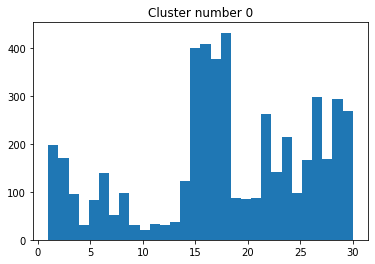

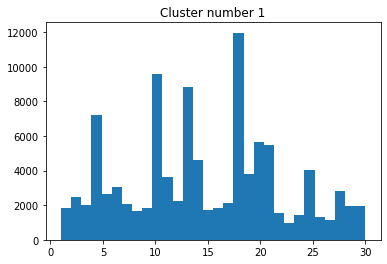

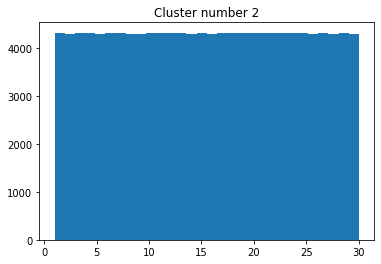

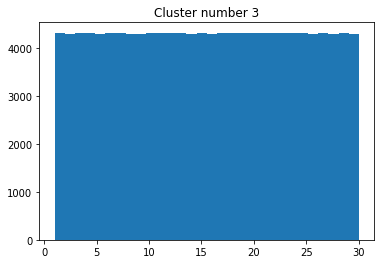

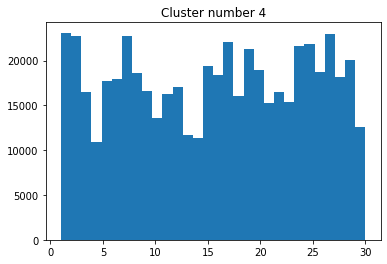

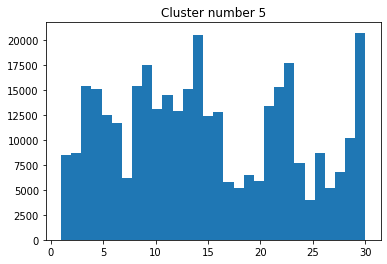

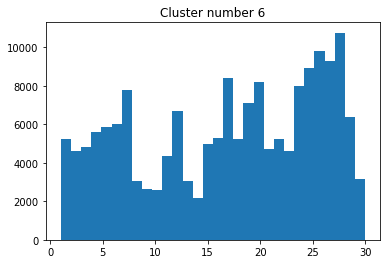

In [179]:
for cluster_num in range(7):
    cluster_mask = np.nonzero(test==cluster_num)
    timestamp_arr = b827ebc178d2_timestamps_dt[cluster_mask]
    plt.hist(timestamp_arr, bins=30)
    plt.title('Cluster number ' + str(cluster_num))
#     plt.plot(timestamp_arr, test[cluster_mask])
    plt.show()